## 1. Import des librairies

In [1]:
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import pandas as pd
import numpy as np
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF

sns.set_style("whitegrid")
%matplotlib inline

## 2. Chargement des données

In [2]:
df = pd.read_csv("data/clean.csv")

In [3]:
df

,tags,document
0,['node.js'],Restart node upon change file For someone come...
1,"['html', 'css']",100 Min Height CSS layout What best way make e...
2,"['regex', 'language-agnostic']",How Stack Overflow generate SEOfriendly URLs W...
3,['java'],Get OSlevel system information I currently bui...
4,['security'],Disable browser Save Password functionality On...
...,...,...
14983,['oop'],What difference interface abstract class What ...
14984,"['ios', 'xcode']",How symbolicate crash log Xcode Xcode 5 organi...
14985,"['java', 'spring']",Spring Boot multiple external configuration fi...
14986,"['java', 'c++']",Java final vs C const The Java C programmers t...


## 3. Transformation texte en matrice TF-IDF

In [4]:
tf_idf_vectorizer_mono = TfidfVectorizer(ngram_range=(1,1))

In [5]:
tf_idf_vectorizer_bi = TfidfVectorizer(ngram_range=(2,2))

In [6]:
tf_idf_matrix_mono = tf_idf_vectorizer_mono.fit_transform(df["document"].values)

In [7]:
tf_idf_matrix_bi = tf_idf_vectorizer_bi.fit_transform(df["document"].values)

In [8]:
tf_idf_matrix_mono.shape

(14988, 71533)

In [9]:
tf_idf_matrix_bi.shape

(14988, 538487)

In [17]:
def find_optimal_cluster(data, max_k):
    iters = range(1, max_k+1, 5)
    sse = []
    
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
    fig, ax = plt.subplots(1,1, figsize=(15, 5))
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Nombre de Clusters')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title("SSE par nombre de clusters")
    plt.tight_layout()
    plt.show()

### Monogram

Fit 1 clusters
Fit 6 clusters
Fit 11 clusters
Fit 16 clusters
Fit 21 clusters
Fit 26 clusters
Fit 31 clusters
Fit 36 clusters
Fit 41 clusters
Fit 46 clusters
Fit 51 clusters
Fit 56 clusters
Fit 61 clusters
Fit 66 clusters
Fit 71 clusters
Fit 76 clusters
Fit 81 clusters
Fit 86 clusters
Fit 91 clusters
Fit 96 clusters
Fit 101 clusters
Fit 106 clusters
Fit 111 clusters
Fit 116 clusters
Fit 121 clusters
Fit 126 clusters
Fit 131 clusters
Fit 136 clusters
Fit 141 clusters
Fit 146 clusters
Fit 151 clusters
Fit 156 clusters
Fit 161 clusters
Fit 166 clusters
Fit 171 clusters
Fit 176 clusters
Fit 181 clusters
Fit 186 clusters
Fit 191 clusters
Fit 196 clusters


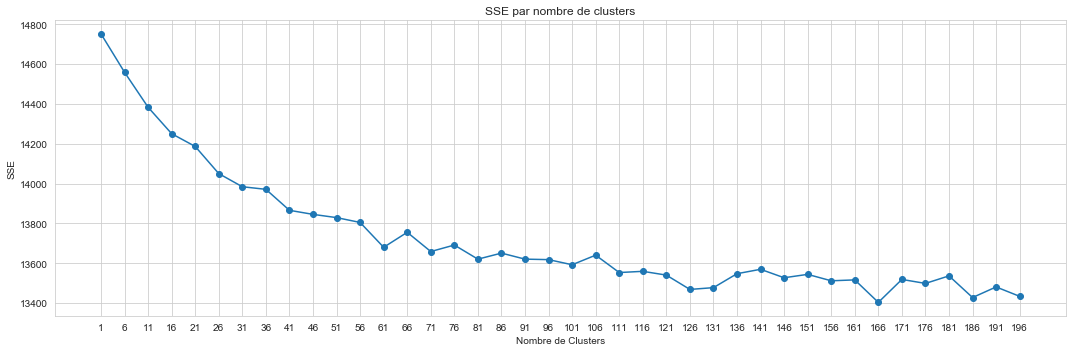

In [19]:
find_optimal_cluster(tf_idf_matrix_mono, 200)

In [21]:
clusters = MiniBatchKMeans(n_clusters=126, init_size=1024, batch_size=2048, random_state=20).fit_predict(tf_idf_matrix_mono)

In [22]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')

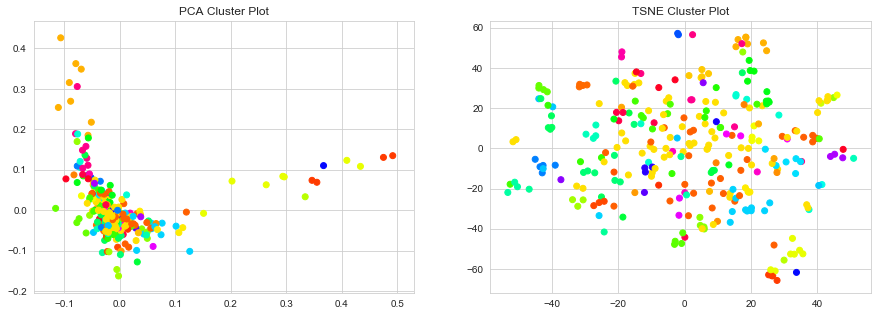

In [23]:
plot_tsne_pca(tf_idf_matrix_mono, clusters)

In [24]:
def get_top_keywords(data, clusters, labels, n_terms):
    temp_df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i, r in temp_df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))

In [26]:
get_top_keywords(tf_idf_matrix_mono, clusters, tf_idf_vectorizer_mono.get_feature_names(), 10)


Cluster 0
wellrounded,databaserelated,work,concept,concepts,answer,important,developers,don,databases

Cluster 1
uniqueptr,endl,cout,const,char,int,use,string,vector,std

Cluster 2
id,void,w3c,valid,validator,html5,elements,tag,nonvoid,selfclosing

Cluster 3
1787,terminal,application,detach,child,session,screen,nohup,process,kill

Cluster 4
what,net,python,how,use,application,linux,service,run,windows

Cluster 5
change,repository,commit,local,push,merge,remote,master,git,branch

Cluster 6
back,context,application,screen,activities,call,fragment,intent,android,activity

Cluster 7
app,xcode,let,nsstring,code,string,use,how,objectivec,swift

Cluster 8
find,try,install,run,code,get,error,use,how,python

Cluster 9
way,check,javascript,how,plugin,function,load,ajax,use,jquery

Cluster 10
em,filec,div,listgroupitem,pullright,productcolor,gemstore,chromeextension,storecontroller,productcolorhtml

Cluster 11
instance,python,self,interface,methods,java,static,object,abstract,class

Cluster 12
u

### Bigram

Fit 1 clusters
Fit 6 clusters
Fit 11 clusters
Fit 16 clusters
Fit 21 clusters
Fit 26 clusters
Fit 31 clusters
Fit 36 clusters
Fit 41 clusters
Fit 46 clusters
Fit 51 clusters
Fit 56 clusters
Fit 61 clusters
Fit 66 clusters
Fit 71 clusters
Fit 76 clusters
Fit 81 clusters
Fit 86 clusters
Fit 91 clusters
Fit 96 clusters
Fit 101 clusters
Fit 106 clusters
Fit 111 clusters
Fit 116 clusters
Fit 121 clusters
Fit 126 clusters
Fit 131 clusters
Fit 136 clusters
Fit 141 clusters
Fit 146 clusters
Fit 151 clusters
Fit 156 clusters
Fit 161 clusters
Fit 166 clusters
Fit 171 clusters
Fit 176 clusters
Fit 181 clusters
Fit 186 clusters
Fit 191 clusters
Fit 196 clusters


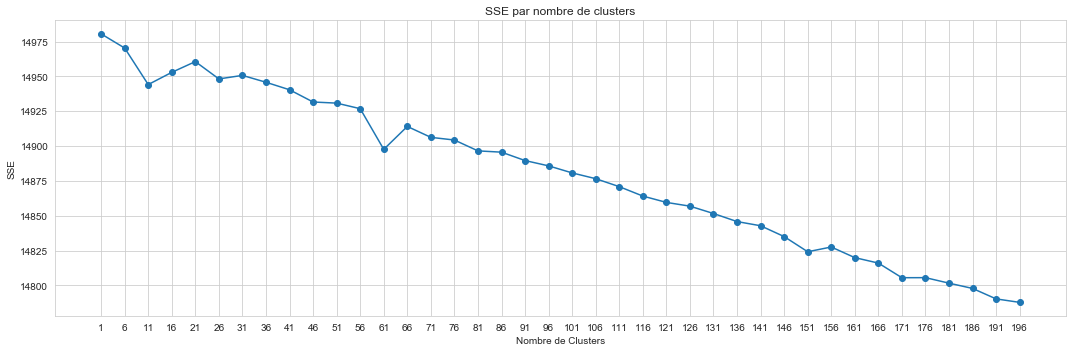

In [27]:
find_optimal_cluster(tf_idf_matrix_bi, 200)

## LDA

In [22]:
lda = LatentDirichletAllocation(n_components=20, max_iter=5, learning_method='online', learning_offset=50, random_state=20).fit(tf_idf_matrix)

In [25]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic {}".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words -1: -1]]))

In [27]:
display_topics(lda, tf_idf_vectorizer.get_feature_names(), 5)


Topic 0
page give mov langerrors rax dword ptr

Topic 1
scss hips hesc mmmanufacturerid import regular

Topic 2
county ternary conditional anujmtest serializedname county al

Topic 3
comandroidsupport compile comandroidsupport picasso ccffibackendc makeshared

Topic 4
secondcomponent detect network arrayliststring string convert arrayliststring mmword ptr

Topic 5
addressbook catransaction cleartext http cleartext peer authentication

Topic 6
usersmichaeljamesdocumentsprojectsprojmeannodemodulesexpressnodemodulesconnectlibprotojs next usersmichaeljamesdocumentsprojectsprojmeannodemodulesexpressnodemodulesconnectlibprotojs usersmichaeljamesdocumentsprojectsprojmeannodemodulesjadelibjadejs open pdf usersmichaeljamesdocumentsprojectsprojmeannodemodulesexpressnodemodulesconnectlibprotojs 193

Topic 7
outerscopevar tiendas muse huawei playery

Topic 8
pandasparserc log4j warn log4jproperties python27libsitepackagespandasparserpyd nrows

Topic 9
loginrequired route change 20110815 css conte

## NMF

In [29]:
nmf = NMF(n_components=20, max_iter=5, random_state=20).fit(tf_idf_matrix)

In [30]:
display_topics(nmf, tf_idf_vectorizer.get_feature_names(), 5)


Topic 0
use function code like would

Topic 1
git commit repository push change

Topic 2
android layoutwidth layoutheight android layoutwidth android layoutheight

Topic 3
124 124 124 group mysql null

Topic 4
file line directory folder how

Topic 5
div div class div div height class

Topic 6
string convert character how how convert

Topic 7
class public static int void

Topic 8
table sql database mysql query

Topic 9
what java use best what best

Topic 10
difference what difference what vs function

Topic 11
python install print pip run

Topic 12
array value int var numpy

Topic 13
list item how color sort

Topic 14
object date javascript json how

Topic 15
image docker css container size

Topic 16
branch master remote git branch remote branch

Topic 17
script command shell bash shell script

Topic 18
input value type jquery text

Topic 19
request data page http post


In [ ]:
tfidf_mono_features_nm = tfidf_mono_vectorizer.get_feature_names()

In [ ]:
def top_tags_from_nmf(x, vec_model, nmf_mod, score_min=0.05):
    """Returns dictionnary with words maximally associated to document and their relative NMF score.
    Score of words are calculated by multiplication between NMF transformed W matrix and NMF fitted H
    (vocabulary) value to get importance of each words into topic definition.
    Args:
        x: Token to be analyzed (list of ngrams)
        vec_model: Vectorizer model used for TFIDF calculation
        nmf_mod: Trained NMF model
        score_min: threshold score for keeping word
    """
    tfidf_target = vec_model.transform(x)
    target_nmf_trans = nmf_mod.transform(tfidf_target)
    
    tags_scores = np.dot(target_nmf_trans, nmf_mod.components_).tolist()[0]

    dict_tags_score = dict(zip(tfidf_mono_features_nm, tags_scores))
    
    return { k: v for k, v in dict_tags_score.items() if v >= score_min }
